In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

###**Reading Files**

In [ ]:
ball=pd.read_csv('/content/drive/MyDrive/WiDS_Dataset/IPL_Ball_by_Ball_2008_2022.csv')
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
matches=pd.read_csv('/content/drive/MyDrive/WiDS_Dataset/IPL_Matches_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
df=pd.merge(ball,matches,on='ID',how='right')
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


###**Pre-processing Data**

In [ ]:
df['date']=pd.to_datetime(df['Date'])
df=df.sort_values(by=['date','innings','overs','ballnumber'])
df.head(6)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,date
225729,335982,1,0,1,SC Ganguly,P Kumar,BB McCullum,legbyes,0,1,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225730,335982,1,0,2,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225731,335982,1,0,3,BB McCullum,P Kumar,SC Ganguly,wides,0,1,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225732,335982,1,0,4,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225733,335982,1,0,5,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225734,335982,1,0,6,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18


In [ ]:
df['Team1'].unique()

array(['Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [ ]:
df=df.replace(['Pune Warriors','Rising Pune Supergiant','Delhi Daredevils'],['Rising Pune Supergiants','Rising Pune Supergiants','Delhi Capitals'])
df

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,date
225729,335982,1,0,1,SC Ganguly,P Kumar,BB McCullum,legbyes,0,1,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225730,335982,1,0,2,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225731,335982,1,0,3,BB McCullum,P Kumar,SC Ganguly,wides,0,1,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225732,335982,1,0,4,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
225733,335982,1,0,5,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,1312200,2,17,3,DA Miller,R Ashwin,Shubman Gill,NaN,1,0,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022-05-29
229,1312200,2,17,4,Shubman Gill,R Ashwin,DA Miller,NaN,0,0,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022-05-29
230,1312200,2,17,5,Shubman Gill,R Ashwin,DA Miller,NaN,1,0,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022-05-29
231,1312200,2,17,6,DA Miller,R Ashwin,Shubman Gill,NaN,2,0,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022-05-29


In [ ]:
df['year']=pd.DatetimeIndex(df['date']).year
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,date,year
225729,335982,1,0,1,SC Ganguly,P Kumar,BB McCullum,legbyes,0,1,...,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18,2008
225730,335982,1,0,2,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18,2008
225731,335982,1,0,3,BB McCullum,P Kumar,SC Ganguly,wides,0,1,...,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18,2008
225732,335982,1,0,4,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18,2008
225733,335982,1,0,5,BB McCullum,P Kumar,SC Ganguly,NaN,0,0,...,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen,2008-04-18,2008


In [ ]:
columns = ['WonBy' , 'Margin' , 'Umpire1' , 'Umpire2' , 'batter' , 'non-striker' , 'bowler' , 'non_boundary' , 'kind' , 'player_out' , 'fielders_involved' , 'extra_type' , 'Player_of_Match', 'Venue' , 'City' ]
df1 = df.drop(columns = columns)
df1.head()


,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,BattingTeam,Date,...,Team2,TossWinner,TossDecision,SuperOver,WinningTeam,method,Team1Players,Team2Players,date,year
225729,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,NaN,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225730,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,NaN,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225731,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,NaN,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225732,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,NaN,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225733,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,NaN,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008


In [ ]:
df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [ ]:
df1['method']=df1['method'].fillna('Normal')
df1.head()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,BattingTeam,Date,...,Team2,TossWinner,TossDecision,SuperOver,WinningTeam,method,Team1Players,Team2Players,date,year
225729,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225730,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225731,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225732,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225733,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008


In [ ]:
df1=df1.dropna()
df1.isnull().sum()

ID                  0
innings             0
overs               0
ballnumber          0
batsman_run         0
extras_run          0
total_run           0
isWicketDelivery    0
BattingTeam         0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
method              0
Team1Players        0
Team2Players        0
date                0
year                0
dtype: int64

In [ ]:

df1.head()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,BattingTeam,Date,...,Team2,TossWinner,TossDecision,SuperOver,WinningTeam,method,Team1Players,Team2Players,date,year
225729,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225730,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225731,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225732,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
225733,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008


In [ ]:
df1.reset_index(inplace=True)
df1.drop(columns=['index'],inplace=True)
df1.head()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,BattingTeam,Date,...,Team2,TossWinner,TossDecision,SuperOver,WinningTeam,method,Team1Players,Team2Players,date,year
0,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
1,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
2,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
3,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008
4,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Normal,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,2008


###**ONE HOT ENCODING**

In [ ]:
dummy_toss=pd.get_dummies(df1['TossDecision'])
df_enc=pd.concat([df1,dummy_toss],axis='columns')
df_enc.drop(columns=['TossDecision','bat','year'],inplace=True) #the bat column does not provide any new information therefore dropped
#df_enc
dummy_method=pd.get_dummies(df1['method'])
df_enc=pd.concat([df_enc,dummy_method],axis=1)
df_enc.drop(columns=['method','Normal'],inplace=True)  #The normal column does not add any new value so dropping it along with the original column
df_enc.head()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,BattingTeam,Date,...,Team1,Team2,TossWinner,SuperOver,WinningTeam,Team1Players,Team2Players,date,field,D/L
0,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0
1,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0
2,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0
3,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0
4,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0


CREATING A NEW COLUMN WITH THE VALUE AS ID+BATTING TEAM WHICH WILL ACT AS THE ID FOR AN INNING

In [ ]:

df_enc['id_inning']=df_enc['ID'].astype(str)+df_enc['BattingTeam']
df_enc.head()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,BattingTeam,Date,...,Team2,TossWinner,SuperOver,WinningTeam,Team1Players,Team2Players,date,field,D/L,id_inning
0,335982,1,0,1,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders
1,335982,1,0,2,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders
2,335982,1,0,3,0,1,1,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders
3,335982,1,0,4,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders
4,335982,1,0,5,0,0,0,0,Kolkata Knight Riders,2008-04-18,...,Kolkata Knight Riders,Royal Challengers Bangalore,N,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders


In [ ]:
list=df_enc['id_inning'].unique()
len(list)

1892

In [ ]:
df_copy=df_enc.groupby(by=['id_inning']).sum()['total_run'].reset_index()
df_copy.head()

,id_inning,total_run
0,1082591Royal Challengers Bangalore,172
1,1082591Sunrisers Hyderabad,207
2,1082592Mumbai Indians,184
3,1082592Rising Pune Supergiants,187
4,1082593Gujarat Lions,183


In [ ]:
data=pd.merge(left=df_enc,right=df_copy,on='id_inning',how='right')
data.head(6)

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run_x,isWicketDelivery,BattingTeam,Date,...,TossWinner,SuperOver,WinningTeam,Team1Players,Team2Players,date,field,D/L,id_inning,total_run_y
0,1082591,2,0,1,1,0,1,0,Royal Challengers Bangalore,2017-04-05,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
1,1082591,2,0,2,0,0,0,0,Royal Challengers Bangalore,2017-04-05,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
2,1082591,2,0,3,0,0,0,0,Royal Challengers Bangalore,2017-04-05,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
3,1082591,2,0,4,2,0,2,0,Royal Challengers Bangalore,2017-04-05,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
4,1082591,2,0,5,4,0,4,0,Royal Challengers Bangalore,2017-04-05,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
5,1082591,2,0,6,4,0,4,0,Royal Challengers Bangalore,2017-04-05,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172


In [ ]:
data['overs']=data['overs']+(data['ballnumber'])/10



data.drop(columns=['ballnumber'],inplace=True)

data.head(12)

,ID,innings,overs,batsman_run,extras_run,total_run_x,isWicketDelivery,BattingTeam,Date,Season,...,TossWinner,SuperOver,WinningTeam,Team1Players,Team2Players,date,field,D/L,id_inning,total_run_y
0,1082591,2,0.1,1,0,1,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
1,1082591,2,0.2,0,0,0,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
2,1082591,2,0.3,0,0,0,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
3,1082591,2,0.4,2,0,2,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
4,1082591,2,0.5,4,0,4,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
5,1082591,2,0.6,4,0,4,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
6,1082591,2,1.1,0,0,0,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
7,1082591,2,1.2,0,0,0,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
8,1082591,2,1.3,1,0,1,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172
9,1082591,2,1.4,0,0,0,0,Royal Challengers Bangalore,2017-04-05,2017,...,Royal Challengers Bangalore,N,Sunrisers Hyderabad,"['DA Warner', 'S Dhawan', 'MC Henriques', 'Yuv...","['CH Gayle', 'Mandeep Singh', 'TM Head', 'KM J...",2017-04-05,1,0,1082591Royal Challengers Bangalore,172


###**ADDING RUNS AND WICKETS AT EVERY INSTANT OF THE MATCH**

In [ ]:
data_final=pd.DataFrame()
for id in list:
  inning_data=data[data['id_inning']==id]
  cum_total=inning_data.loc[:,'total_run_x'].cumsum(axis=0)
  cum_wicket=inning_data.loc[:,'isWicketDelivery'].cumsum(axis=0)
  inning_data['runs']=cum_total
  inning_data['wickets']=cum_wicket
  data_final=data_final.append(inning_data,ignore_index=True)
data_final.head()

,ID,innings,overs,batsman_run,extras_run,total_run_x,isWicketDelivery,BattingTeam,Date,Season,...,WinningTeam,Team1Players,Team2Players,date,field,D/L,id_inning,total_run_y,runs,wickets
0,335982,1,0.1,0,1,1,0,Kolkata Knight Riders,2008-04-18,2007/08,...,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders,222,1,0
1,335982,1,0.2,0,0,0,0,Kolkata Knight Riders,2008-04-18,2007/08,...,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders,222,1,0
2,335982,1,0.3,0,1,1,0,Kolkata Knight Riders,2008-04-18,2007/08,...,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders,222,2,0
3,335982,1,0.4,0,0,0,0,Kolkata Knight Riders,2008-04-18,2007/08,...,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders,222,2,0
4,335982,1,0.5,0,0,0,0,Kolkata Knight Riders,2008-04-18,2007/08,...,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,335982Kolkata Knight Riders,222,2,0


###**LABEL ENCODING FOR TEAMS**

In [ ]:
from sklearn import preprocessing
p=preprocessing.LabelEncoder()

In [ ]:
data_final['Team1'].unique()

array(['Royal Challengers Bangalore', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Punjab Kings', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [ ]:
team_dict = {'Mumbai Indians':12, 'Chennai Super Kings':11, 'Rajasthan Royals':10, 'Kolkata Knight Riders':9, 'Kings XI Punjab':8,
             'Sunrisers Hyderabad':7, 'Delhi Capitals':6, 'Royal Challengers Bangalore':5, 'Gujarat Lions':4, 'Deccan Chargers':3,
             'Rising Pune Supergiants':2, 'Kochi Tuskers Kerala':1
             }

In [ ]:
temp=data_final.copy()
temp['Team1']=temp.Team1.map(team_dict)
temp['Team2']=temp.Team2.map(team_dict)
temp['WinningTeam']=temp.WinningTeam.map(team_dict)
temp['TossWinner']=temp.TossWinner.map(team_dict)
temp['BattingTeam']=temp.BattingTeam.map(team_dict)
temp.head()
temp.isnull().sum()

ID                     0
innings                0
overs                  0
batsman_run            0
extras_run             0
total_run_x            0
isWicketDelivery       0
BattingTeam         7199
Date                   0
Season                 0
MatchNumber            0
Team1               7917
Team2               6324
TossWinner          6366
SuperOver              0
WinningTeam         8277
Team1Players           0
Team2Players           0
date                   0
field                  0
D/L                    0
id_inning              0
total_run_y            0
runs                   0
wickets                0
dtype: int64

In [ ]:
temp.drop(columns=['id_inning','extras_run','total_run_x','isWicketDelivery','batsman_run'],inplace=True)
temp.head()

,ID,innings,overs,BattingTeam,Date,Season,MatchNumber,Team1,Team2,TossWinner,SuperOver,WinningTeam,Team1Players,Team2Players,date,field,D/L,total_run_y,runs,wickets
0,335982,1,0.1,9.0,2008-04-18,2007/08,1,5.0,9.0,5.0,N,9.0,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,1,0
1,335982,1,0.2,9.0,2008-04-18,2007/08,1,5.0,9.0,5.0,N,9.0,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,1,0
2,335982,1,0.3,9.0,2008-04-18,2007/08,1,5.0,9.0,5.0,N,9.0,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,2,0
3,335982,1,0.4,9.0,2008-04-18,2007/08,1,5.0,9.0,5.0,N,9.0,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,2,0
4,335982,1,0.5,9.0,2008-04-18,2007/08,1,5.0,9.0,5.0,N,9.0,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,2,0


In [ ]:
X=temp.copy()
y_winner=X.iloc[:,-7].values
y_winner=y_winner.reshape(-1,1)
X.drop(columns=['WinningTeam','ID','Date', 'Season'],inplace=True)
X.isnull().sum()

innings            0
overs              0
BattingTeam     7199
MatchNumber        0
Team1           7917
Team2           6324
TossWinner      6366
SuperOver          0
Team1Players       0
Team2Players       0
date               0
field              0
D/L                0
total_run_y        0
runs               0
wickets            0
dtype: int64

In [ ]:

X.head()

,innings,overs,BattingTeam,MatchNumber,Team1,Team2,TossWinner,SuperOver,Team1Players,Team2Players,date,field,D/L,total_run_y,runs,wickets
0,1,0.1,9.0,1,5.0,9.0,5.0,N,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,1,0
1,1,0.2,9.0,1,5.0,9.0,5.0,N,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,1,0
2,1,0.3,9.0,1,5.0,9.0,5.0,N,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,2,0
3,1,0.4,9.0,1,5.0,9.0,5.0,N,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,2,0
4,1,0.5,9.0,1,5.0,9.0,5.0,N,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",2008-04-18,1,0,222,2,0


In [ ]:
y=X.iloc[:,-3].values#Extracting the total runs column from the dataframe most important feature for predicting the winner
y=y.reshape(-1,1)#Reshaping the numpy array 

#y=pd.DataFrame(data=y[0:,0],columns=['runs_total'])
X.drop(columns=['total_run_y'],inplace=True)
X.drop(columns=['MatchNumber'],inplace=True)
X.drop(columns=['SuperOver'],inplace=True)
X.drop(columns=['Team1Players'],inplace=True)
X.drop(columns=['Team2Players'],inplace=True)
X.drop(columns=['date'],inplace=True)
X.drop(columns=['BattingTeam'],inplace=True)
X.drop(columns=['Team2'],inplace=True)
X.drop(columns=['Team1'],inplace=True)
X.drop(columns=['TossWinner'],inplace=True)
X

,innings,overs,field,D/L,runs,wickets
0,1,0.1,1,0,1,0
1,1,0.2,1,0,1,0
2,1,0.3,1,0,2,0
3,1,0.4,1,0,2,0
4,1,0.5,1,0,2,0
...,...,...,...,...,...,...
225577,2,17.3,0,0,124,3
225578,2,17.4,0,0,124,3
225579,2,17.5,0,0,125,3
225580,2,17.6,0,0,127,3


###**CUSTOM ACCURACY FUNCTION**

In [ ]:
def custom_accu(y_test,y_pred,thresh):

  correct=0
  length=len(y_pred)
  for i in range(0,length):

    if(abs(y_test[i]-y_pred[i])<=thresh):

      correct=correct+1
  return((correct/length)*100)

###**MODELS**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [ ]:

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5,random_state=1)

###**LINEAR REGRESSION**

In [ ]:

lin_reg=make_pipeline(StandardScaler(),LinearRegression())
lin_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred=lin_reg.predict(X_test)
y_test.shape

(112791, 1)

In [ ]:
print('Custom accuracy is: '+str(custom_accu(y_test,y_pred,12))+'%')

Custom accuracy is: 48.17316984511176%


###**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=make_pipeline(StandardScaler(),RandomForestRegressor())
rfr.fit(X_train,y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
y_predict=rfr.predict(X_test)
print('Custom accuracy is:'+str(custom_accu(y_test,y_predict,10))+'%')

Custom accuracy is:42.805720314564105%


In [ ]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
svr = SVR()

In [ ]:
rf = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators = 500,
                                                           max_depth = 100)
                  )
rf.fit(X_train, y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=100, n_estimators=500))])

In [ ]:
y_predict=rf.predict(X_test)
print('Custom accuracy is:'+str(custom_accu(y_test,y_predict,10))+'%')


Custom accuracy is:42.73833905187471%


[]

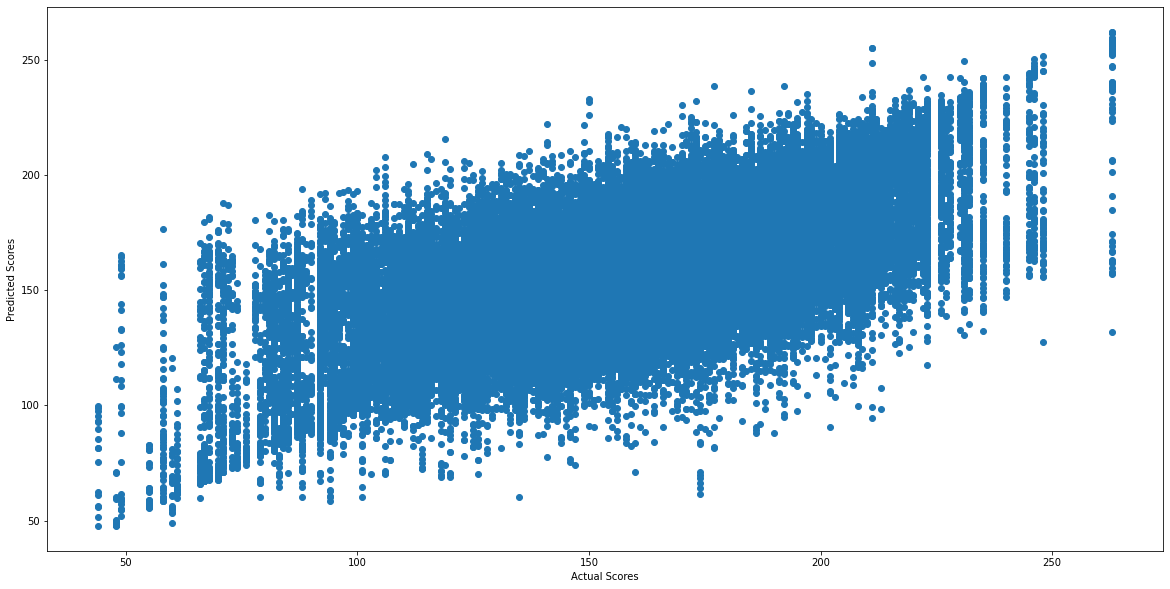

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.plot()